# Principal Component Analysis (PCA) for Wine dataset

Principal Component Analysis (PCA) is a technique used for dimensionality reduction. It can be applied to the Wine dataset, which contains chemical properties of wine varieties to help reduce the number of variables while preserving as much of the variation as possible. Here’s an example of how PCA could be applied to the Wine dataset in Python:

Steps for applying PCA to the Wine dataset:

1. Load the dataset: Use sklearn.datasets to load the wine dataset.
2. Standardize the data: PCA is sensitive to the variance of the variables, so it's essential to scale the data.
3. Apply PCA: Use sklearn.decomposition.PCA to perform PCA on the standardized data.
3. Visualize the results

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.graph_objects as go

#Import the built-in dataset (Wine recognition) for this problem
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
print(sklearn.datasets.load_wine().DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [23]:
#laod the dataset
wine = datasets.load_wine()
X = pd.DataFrame(wine.data)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [24]:
# laod the vector of target variable
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## PCA

In [25]:
def eigen(data):
    # Calculate the eigenvalues and corresponding eigenvectors of the input matrix 'data'
    eigenValues, eigenVectors = np.linalg.eig(data)

    # Sort the indices of eigenvalues in descending order
    idx = eigenValues.argsort()[::-1]

    # Reorder the eigenvalues according to sorted indices
    eigenValues = eigenValues[idx]

    # Reorder the corresponding eigenvectors according to sorted indices
    eigenVectors = eigenVectors[:, idx]

    # Print the sorted eigenvalues and corresponding eigenvectors
    print("eigenValues = ", eigenValues, "\n", "eigenVectors : \n", eigenVectors, "\n")

    # Return the sorted eigenvalues and eigenvectors
    return eigenValues, eigenVectors


### Explained Python Code for Eigenvalue and Eigenvector Computation

1. **Import the Necessary Library:**
   - `import numpy as np`: Imports numpy, essential for numerical computations and matrix operations.

2. **Function Definition:**
   - `def eigen(data)`: Defines a function `eigen` that expects a square matrix `data` to compute eigenvalues and eigenvectors.

3. **Compute Eigenvalues and Eigenvectors:**
   - `eigenValues, eigenVectors = np.linalg.eig(data)`: Computes both eigenvalues and eigenvectors using numpy's linear algebra module.
   - [Detailed Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

4. **Sorting Indices of Eigenvalues:**
   - `idx = eigenValues.argsort()[::-1]`: Determines the indices that would sort the eigenvalues in descending order.

5. **Reorder Eigenvalues:**
   - `eigenValues = eigenValues[idx]`: Reorders the eigenvalues based on the sorted indices.

6. **Reorder Eigenvectors:**
   - `eigenVectors = eigenVectors[:, idx]`: Adjusts the eigenvectors to align with the sorted order of the eigenvalues.

7. **Output Sorted Eigenvalues and Eigenvectors:**
   - `print("eigenValues = ", eigenValues, "\n", "eigenVectors : \n", eigenVectors)`: Prints the sorted eigenvalues and corresponding eigenvectors.

8. **Return the Results:**
   - `return eigenValues, eigenVectors`: Returns the sorted eigenvalues and eigenvectors for further use.


In [26]:
# Create a copy of the original DataFrame to avoid modifying the original directly
X_copy = X.copy()

# Standardize each column in the DataFrame
# Subtract the mean and divide by the standard deviation of each column
X_std = (X_copy - X_copy.mean()) / X_copy.std()

# Calculate the covariance matrix of the centered data
covariance_matrix = X_std.cov()

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenValues, eigenVectors = eigen(covariance_matrix)

# Calculate the proportion of variance captured by each principal component
variance_captured_each = eigenValues *100 / sum(eigenValues)

# Output the variance captured by each component
print("variance(%) captured by respective principal Component", variance_captured_each)


eigenValues =  [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794] 
 eigenVectors : 
 [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636  0.39613926 -0.50861912  0.21160473 -0.22591696 -0.26628645
  -0.01496997]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391  0.06582674  0.07528304 -0.30907994  0.07648554  0.12169604
  -0.02596375]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061 -0.17026002  0.30769445 -0.02712539 -0.49869142 -0.04962237
   0.14121803]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914  0.42797018 -0.20044931  0.05279942  0.47931378 -0.05574287
  -0.09168285]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.15636143 -0.27140257  0.06787022  0.07128891  0.06222011
  -0.05677422]
 [-0

1. **Copying the DataFrame:**
  - `X_std = X.copy()`: This command is used to make a complete copy of the original DataFrame `X`. Copying is crucial to prevent alterations to the original dataset during the standardization process.

2. **Standardizing the Data:**
  - `X_std = (X_std - X_std.mean()) / X_std.std()`: Performs the standardization of the dataset:
    - `X_std.mean()`: Computes the mean of each column, which is used to center the data around zero.
    - `X_std.std()`: Computes the standard deviation of each column, which is used to scale the data to a standard deviation of one.
    - The formula `(X_std - X_std.mean()) / X_std.std()` adjusts each data point so that the resultant column has a mean of zero and a standard deviation of one, aligning with the assumptions of many statistical models and machine learning algorithms.

3. **Calculating Covariance Matrix:**
   - `covariance_matrix = X_std.cov()`: Calculates the covariance matrix from the Standardized data. The covariance matrix will be used to determine the principal components.

4. **Eigenvalue Decomposition:**
   - `eigenValues, eigenVectors = eigen(covariance_matrix)`: Uses the previously defined function `eigen` to compute the eigenvalues and eigenvectors of the covariance matrix, key steps in PCA.

5. **Variance Explained by Each Component:**
   - `variance_captured_each = eigenValues / sum(eigenValues)`: Computes the proportion of the total variance that each eigenvalue (principal component) explains. This is critical for understanding the effectiveness of each principal component in capturing the variability of the data.

6. **Output the Explained Variance:**
   - `print(variance_captured_each)`: Displays the proportion of variance each principal component captures, aiding in decision-making about how many components to retain.


In [27]:
# Calculate the cumulative sum of the explained variance ratios
cumulative_variance_captured = np.cumsum(eigenValues)*100 / sum(eigenValues)

# Output the cumulative variance captured by the principal components
print("cumulative variance(%) captured", cumulative_variance_captured)


cumulative variance(%) captured [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]




1. **Calculating Cumulative Variance Explained:**
   - `variance_captured = np.cumsum(eigenValues) / sum(eigenValues)`: Computes the cumulative variance explained by principal components. It uses the `np.cumsum()` function to sum eigenvalues cumulatively, then divides by the total sum of eigenvalues. This provides the cumulative proportion of the dataset's total variance that is explained by adding each successive principal component.

2. **Output the Cumulative Explained Variance:**
   - `print(variance_captured)`: Displays the cumulative variance explained, which is a key metric in determining the effectiveness of PCA and deciding how many components to retain based on cumulative variance.


- Here we can see the Cumilative of Variance captured by components
- For example PC1 captures 36.20% of total variance
- As such PC1 & PC2 captures 55.41% of total variance and soon...
- As such PC1 , PC2, PC3 captures 66.53% of total variance
- As such PC1 , PC2, PC3, PC4 captures 73.60% of total variance
- As such PC1 , PC2, PC3, PC4, PC5 captures 80.16% of total variance

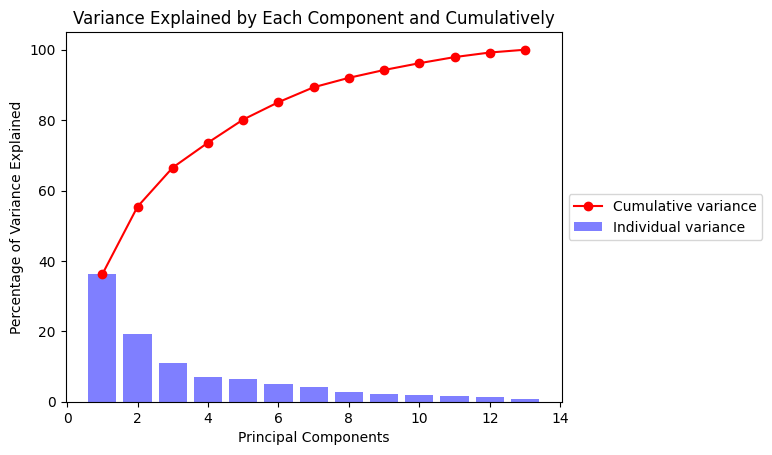

In [28]:
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the variance captured by each principal component
ax.bar(range(1, len(variance_captured_each) + 1), variance_captured_each, alpha=0.5, color='b', label='Individual variance')

# Plot the cumulative variance captured
ax.plot(range(1, len(cumulative_variance_captured) + 1), cumulative_variance_captured, color='r', marker='o', label='Cumulative variance')

# Ensure x-axis ticks are only integers
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Add labels and title
ax.set_xlabel('Principal Components')
ax.set_ylabel('Percentage of Variance Explained')
ax.set_title('Variance Explained by Each Component and Cumulatively')

# Add a legend to the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

In [29]:
# Project the original data onto the new principal component axes
# np.dot is used to perform matrix multiplication between the data matrix X and the matrix of eigenvectors
pca_projection = np.dot(np.array(X), eigenVectors)

# Create a DataFrame from the PCA projection with specified column names for each principal component
pca_df = pd.DataFrame(pca_projection, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"])

# Display the newly created DataFrame with PCA components
display(pca_df)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-325.637020,436.868698,-108.881634,288.214464,-80.418347,132.314102,-117.416976,119.004093,567.783187,183.355103,587.131637,-76.388049,-24.177750
1,-317.812078,422.143492,-113.299757,276.042056,-97.579833,130.657703,-108.887647,119.025790,567.787944,178.672782,575.526193,-77.251627,-22.083503
2,-355.267740,472.707109,-125.247133,306.317314,-117.678655,145.041126,-117.892168,138.540148,644.197093,200.414499,651.441429,-87.834780,-24.886563
3,-442.477439,585.573346,-162.736042,379.043770,-156.357007,180.439053,-143.875942,170.922662,809.883593,248.490107,810.843142,-109.641939,-29.430016
4,-227.486905,313.004257,-64.458236,208.275936,-34.155076,92.764734,-88.234108,82.698231,379.947738,128.924057,411.236768,-52.024705,-19.270682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-222.628343,310.732186,-69.757825,200.344442,-51.500248,92.946463,-81.801102,87.477799,389.277969,126.539154,412.370961,-51.825681,-17.211145
174,-226.502009,315.739704,-68.545825,205.792778,-47.709397,93.112711,-83.571082,88.539696,392.762368,129.195801,419.298296,-52.868240,-17.965467
175,-253.624048,353.684331,-79.335987,231.622065,-48.333532,103.240428,-96.269298,94.581869,437.343475,143.186207,465.198379,-56.443774,-20.008715
176,-255.586884,354.636593,-79.855396,233.730174,-49.153450,103.231834,-96.235854,95.037183,440.208178,144.801621,467.710949,-57.554507,-19.982920




- **Projecting Data onto Principal Components:**
  - `np.dot(np.array(X), eigenVectors)`: This line multiplies the original data matrix `X` by the eigenvectors derived from PCA. It transforms the data from its original axis system to a new axis system defined by the principal components, effectively reducing dimensionality while retaining essential information.

- **Creating a DataFrame from PCA Projections:**
  - `pca_df = pd.DataFrame(pca_projection, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])`: Constructs a DataFrame using the data projected onto the principal components. The DataFrame is explicitly labeled with columns "PC1" through "PC4" to represent each of the first four principal components, facilitating easier analysis of the data in its new form.

- **Outputting the PCA DataFrame:**
  - `display(pca_df)`: Prints the resulting DataFrame to display how the original data has been decomposed into principal components. This representation is crucial for visualizing and analyzing the structure and spread of the data along the axes of maximum variance.




- Lets say we are satisfied with capturing 80% of original variance
- From the Cumulative variance captured we can see with PC1, PC2, PC3, PC4 and PC5 alone we are able to capture 80.16% of original variance

In [30]:
# Drop columns corresponding to the third and fourth principal components
# axis=1 specifies that columns are to be dropped, inplace=True modifies the DataFrame directly
pca_df.drop(["PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"], axis=1, inplace=True)

# Display the modified DataFrame that now contains only the first two principal components
display(pca_df)

,PC1,PC2,PC3,PC4,PC5
0,-325.637020,436.868698,-108.881634,288.214464,-80.418347
1,-317.812078,422.143492,-113.299757,276.042056,-97.579833
2,-355.267740,472.707109,-125.247133,306.317314,-117.678655
3,-442.477439,585.573346,-162.736042,379.043770,-156.357007
4,-227.486905,313.004257,-64.458236,208.275936,-34.155076
...,...,...,...,...,...
173,-222.628343,310.732186,-69.757825,200.344442,-51.500248
174,-226.502009,315.739704,-68.545825,205.792778,-47.709397
175,-253.624048,353.684331,-79.335987,231.622065,-48.333532
176,-255.586884,354.636593,-79.855396,233.730174,-49.153450


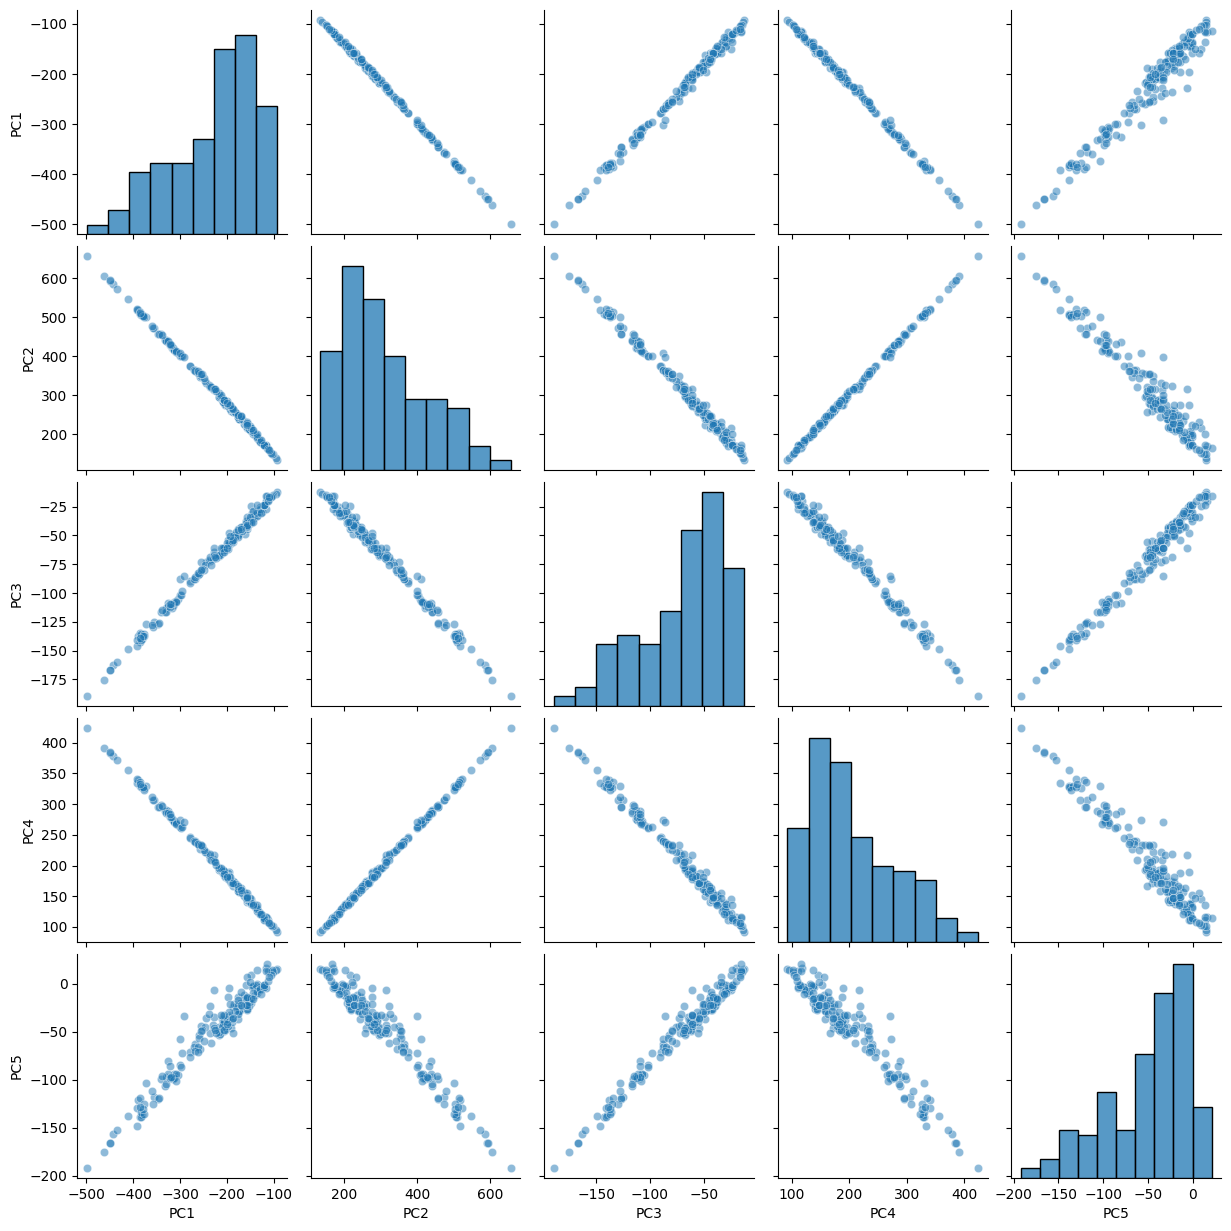

In [33]:
# Create pairwise scatter plot
sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], plot_kws={'alpha': 0.5})
plt.show()

- **Preparing Categories and Colors:**
  - `categories = np.unique(y)`: Identifies all unique categories within the target variable 'y'.
  - `colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))`: Assigns a distinct color from the Viridis colormap to each category.

- **Plotting Setup and Execution:**
  - `fig, ax = plt.subplots(figsize=(10, 8))`: Creates a new figure and axes with specified dimensions.
  - Loop through each category and color:
    - `ix = np.where(y == category)`: Locates the indices for data points of each category.
    - `ax.scatter(...)`: Adds these points to the scatter plot using the designated color and adds a label for the category.

- **Adding a Legend:**
  - `ax.legend(title="Category")`: Places a legend on the plot, with a title, making it clear which color represents which category.

- **Axes Labeling and Titling:**
  - Set labels for the x and y axes and a title for the plot, enhancing readability and understanding.

- **Display the Plot:**
  - `plt.show()`: Visualizes the final scatter plot, showcasing how the data is distributed across the first two principal components, differentiated by categories.



we can see from the graph if we wish to build a classification model on the transformed data, there are easily seperable into different classes.

## PCA using standard libraries

[Detailed Documentation ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [38]:
from sklearn.decomposition import PCA

# Create a PCA object for reducing the dataset to 5 components
pca = PCA(n_components=5)

# Fit the PCA model to the data
pca.fit(X_std)

# Get the variance ratio explained by each of the selected components
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative sum of the explained variance ratios
cum_explained_variance = np.cumsum(explained_variance)

# Print the variance explained by each component
print("Explained captured variance by each component = ", explained_variance)

# Print the cumulative variance explained by the components
print("Explained cumulative captured variance by components = ", cum_explained_variance)

# Print the total explained variance by the 5 components
print("Explained captured variance with 5 components = ", sum(explained_variance))


Explained captured variance by each component =  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
Explained cumulative captured variance by components =  [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293]
Explained captured variance with 5 components =  0.8016229275554787




- **Importing Libraries:**
  - `from sklearn.decomposition import PCA`: This import is necessary for performing PCA.

- **Initialize PCA:**
  - `pca = PCA(n_components=5)`: Sets up PCA to reduce the data to five dimensions, focusing on retaining the most significant features.

- **Fit PCA Model:**
  - `pca.fit(X)`: Applies the PCA model to the dataset \( X \), calculating the necessary statistics (eigenvalues and eigenvectors) for dimensionality reduction.

- **Calculate Explained Variance:**
  - `explained_variance = pca.explained_variance_ratio_`: Extracts the amount of variance each component explains, which helps in understanding the effectiveness of each dimension in capturing the data's variability.

- **Cumulative Explained Variance:**
  - `cum_explained_variance = np.cumsum(explained_variance)`: Determines the total variance explained as more components are considered, useful for assessing overall data representation.

- **Output the Results:**
  - Print statements are used to show the variance explained by each component, the cumulative variance, and the total variance captured by the two main components. This information is crucial for evaluating the PCA model's performance in data reduction and feature extraction.

This setup provides a clear understanding of how much data variance PCA captures with the specified number of components, guiding decisions on dimensionality reduction in data preprocessing for machine learning.
